In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [2]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.21, 1.26, 1.37, 1.52, 1.72, 2.03, 2.48, 3.25, 4.67, 7.18, 9.53])

array([7493.28, 4837.22, 3032.79, 1943.31, 1246.46,  797.43,  518.92,
        337.24,  224.81,  147.51,  118.47])

array([1.05, 1.05, 1.05, 1.07, 1.11, 1.19, 1.28, 1.42, 1.6 , 1.86, 2.22,
       2.66, 3.25, 4.04, 5.05, 9.  ])

array([4.81083e+03, 7.95482e+03, 3.13672e+03, 1.89607e+03, 1.20857e+03,
       7.53610e+02, 4.86640e+02, 3.15130e+02, 2.05640e+02, 1.34330e+02,
       8.75700e+01, 5.72800e+01, 3.71300e+01, 2.43800e+01, 1.59000e+01,
       6.39000e+00])

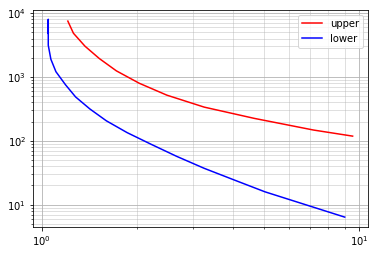

In [3]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[2.74484, -0.962, 0.1174, 0.25109, -0.09071, -0.10556, -0.0189]

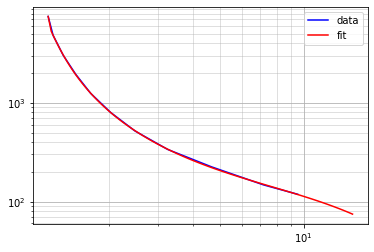

In [7]:
# Curve fitting upper

In = 1.2
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[2.00909, -1.28994, -0.16635, 0.18637, -0.02919, -0.07805]

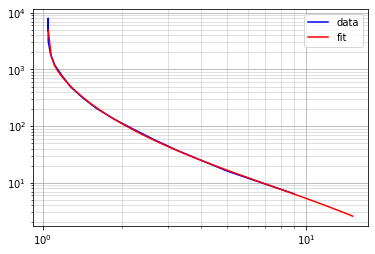

In [10]:
# Curve fitting lower

In=1.03
order=5
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))